In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNNSNMetric_nSN_Total detected',
       '1 to 10 day Microlensing_Fraction detected of total (mean)',
       '100 to 1000 day Microlensing_Fraction detected of total (mean)',
       'KNePopMetric__multi_color_detect_Fraction detected of total (mean)',
       'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Fraction detected of total (mean)',
       'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
       'WeakLensingNvisits_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFSa,u', 'DD:EDFSb,u', 'DD:ELAISS1,g',
       'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g', 'DD:EDFSa,g', 'DD:E

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNNSNMetric_nSN_Total detected',
        'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
        'WeakLensingNvisits_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        '1 to 10 day Microlensing_Fraction detected of total (mean)', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding']#,
       #'NEO bright', 'NEO faint', 'TNO']

linear_cols = []

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNNSNMetric_nSN_Total detected': 'SNeIa',
               '1 to 10 day Microlensing_Fraction detected of total (mean)': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Fraction detected of total (mean)': 'TDE',
               'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)':'TDE',
               'WeakLensingNvisits_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars'}#,
#       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
#               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
#        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
#              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
#              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data['runName']


0        baseline_retrofoot
1                  baseline
2               bluer_indx0
3               bluer_indx1
4                    carina
               ...         
122    vary_nes_nesfrac0.50
123    vary_nes_nesfrac0.55
124    vary_nes_nesfrac0.75
125    vary_nes_nesfrac1.00
126           virgo_cluster
Name: runName, Length: 127, dtype: object

In [6]:
runs =  [name for name in data['runName'].values]
runs

['baseline_retrofoot',
 'baseline',
 'bluer_indx0',
 'bluer_indx1',
 'carina',
 'ddf_frac_ddf_per0.6',
 'ddf_frac_ddf_per1.6',
 'local_gal_bindx0',
 'local_gal_bindx1',
 'local_gal_bindx2',
 'long_gaps_nightsoff0_delayed-1',
 'long_gaps_nightsoff0_delayed1827',
 'long_gaps_nightsoff1_delayed-1',
 'long_gaps_nightsoff1_delayed1827',
 'long_gaps_nightsoff2_delayed-1',
 'long_gaps_nightsoff2_delayed1827',
 'long_gaps_nightsoff3_delayed-1',
 'long_gaps_nightsoff3_delayed1827',
 'long_gaps_nightsoff4_delayed-1',
 'long_gaps_nightsoff4_delayed1827',
 'long_gaps_nightsoff5_delayed-1',
 'long_gaps_nightsoff5_delayed1827',
 'long_gaps_nightsoff6_delayed-1',
 'long_gaps_nightsoff6_delayed1827',
 'long_gaps_nightsoff7_delayed-1',
 'long_gaps_nightsoff7_delayed1827',
 'long_gaps_np_nightsoff0_delayed-1',
 'long_gaps_np_nightsoff0_delayed1827',
 'long_gaps_np_nightsoff0',
 'long_gaps_np_nightsoff1_delayed-1',
 'long_gaps_np_nightsoff1_delayed1827',
 'long_gaps_np_nightsoff2_delayed-1',
 'long_gaps_

In [9]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_49743/3137792346.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


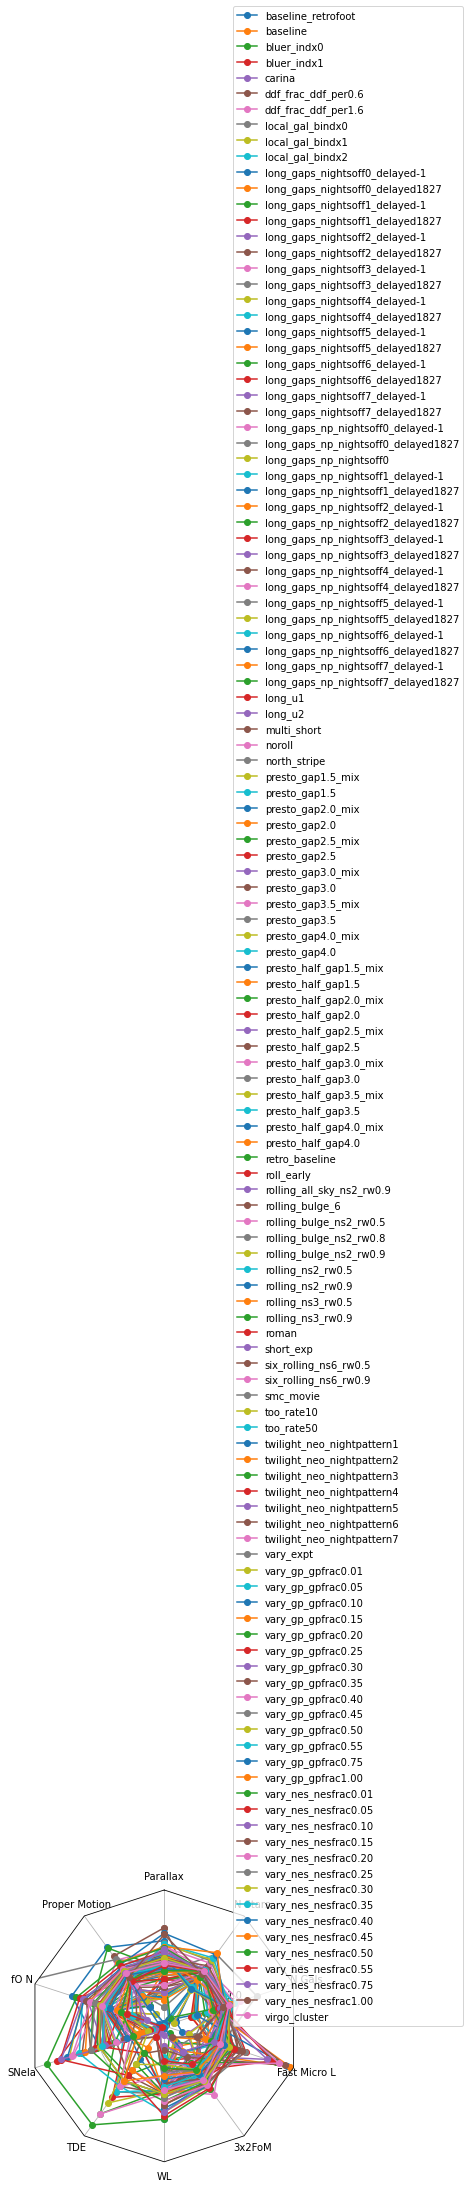

In [8]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [14]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
0,vary_nes_nesfrac0.01,1.022391,1.014716,1.037037,1.070031,1.033708,1.037838,1.012551,1.011981,0.976186,0.997816,0.991192,0.992341,0.933190
1,vary_nes_nesfrac0.05,1.024215,1.014755,1.032258,1.078738,1.112360,1.032432,1.010686,1.034874,0.986797,0.997453,0.992696,0.980306,0.981835
2,vary_nes_nesfrac0.10,1.017965,1.009792,1.026284,1.034273,1.011236,1.027027,1.006632,1.005991,0.990693,1.000905,0.991837,0.989059,0.991071
3,vary_nes_nesfrac0.15,1.020331,1.000514,1.020311,1.036822,1.011236,1.021622,1.010201,1.030167,0.992341,0.996578,0.996133,1.007112,0.995074
4,vary_nes_nesfrac0.20,1.012251,0.996978,1.015532,1.015650,0.853933,1.016216,1.002739,1.002567,0.997461,1.000558,0.996778,0.990153,1.000000
5,vary_nes_nesfrac0.25,1.008736,1.000413,1.008363,1.014032,1.011236,1.010811,1.001641,1.015618,1.000420,0.999479,0.995704,1.002188,0.997537
6,vary_nes_nesfrac0.30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,vary_nes_nesfrac0.35,0.997725,0.997140,0.992832,0.982177,0.910112,0.994595,0.993381,1.001070,1.001840,0.998362,1.001504,0.997812,0.999692
8,vary_nes_nesfrac0.40,0.993539,0.990870,0.983274,0.967833,0.943820,0.983784,0.985424,0.996791,1.002618,0.999978,1.000000,1.002735,1.004310
9,vary_nes_nesfrac0.45,0.995953,0.983952,0.974910,0.929160,0.921348,0.978378,0.985317,0.988447,1.004165,0.999004,1.002363,1.010394,1.001539


/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_49743/1523573111.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


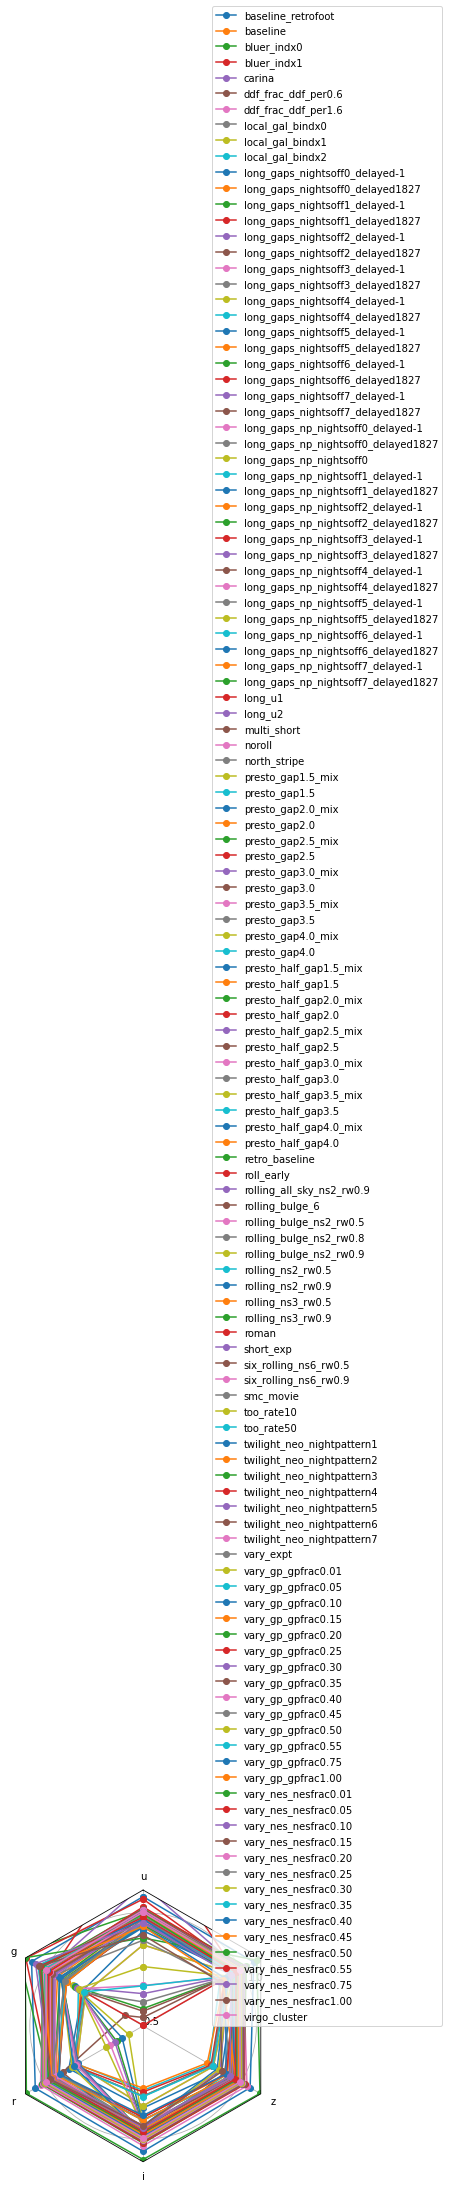

In [10]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.1], alpha=.1)
fig.tight_layout()

In [17]:
runs = ['baseline'] + [name for name in data['runName'].values if 'twi' in name] 

In [18]:
runs

['baseline',
 'twilight_neo_nightpattern1',
 'twilight_neo_nightpattern2',
 'twilight_neo_nightpattern3',
 'twilight_neo_nightpattern4',
 'twilight_neo_nightpattern5',
 'twilight_neo_nightpattern6',
 'twilight_neo_nightpattern7']

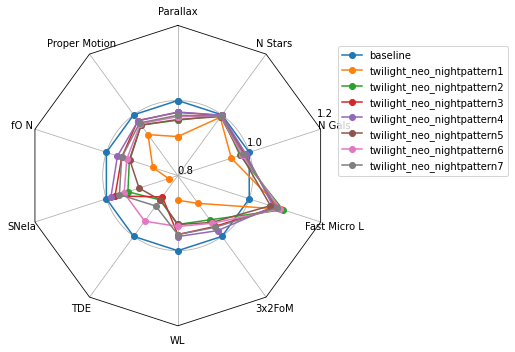

In [19]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.tight_layout()

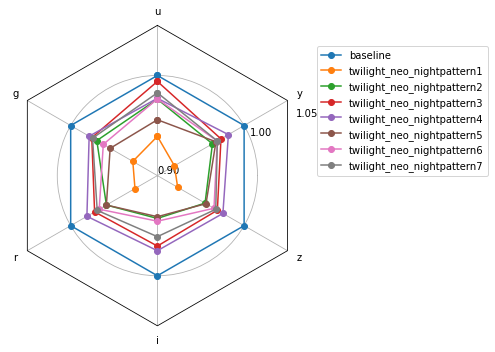

In [20]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.90, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [21]:
runs = ['baseline'] + [name for name in data['runName'].values if 'nes' in name] 

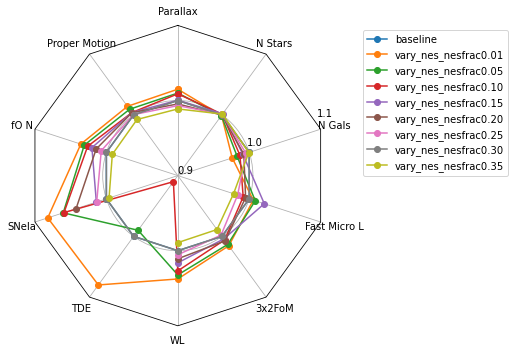

In [24]:
data_normed = norm_df(data, runs[0:9], cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()

In [25]:
runs = ['baseline'] + [name for name in data['runName'].values if 'gp' in name] 

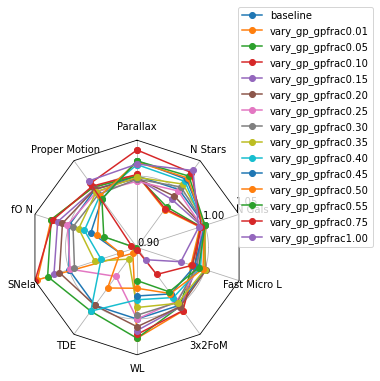

In [28]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.05])
fig.tight_layout()